# H.W 4

**Shavit Chernihov, 
  Tamir Shmilovich**

## Loan Prediction Practice Problem 

### preparations:  
start iPython interface in Inline Pylab mode 

In [1]:
%matplotlib inline

import panda, library that includes data structures and data analysis tools.

In [2]:
import pandas as pd

read the train data set by panda library:

In [3]:
df = pd.read_csv("data//train.csv") 

### exploration
let's check the size of the data set we loaded.

In [4]:
df.shape

(614, 13)

as we can see there are 614 rows and 13 columns. let's get deeper and check for the first 10 rows:

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


we can notice for the attributes in the columns, as we you can see there are some NaN values, factors, and numerical values.

let's start to investigate the numerical values:

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* we can notice the the values for Credit_History is 1 or zero.
* we can notice missing values for each attribute. as we know there are 614 rows in total. so the calculate for nulss for each     attribute will be: 614 - the value of count.
  LoanAmount has 22 Nulls.
  Loan_Amount_Term has 14 Nulls.
  Credit_History has 50 nulls.


investigate the non-numerical values:

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

* we can notice that there are null values:
  Gender has 13 nulls.
  Married has 3 nulls.
  Self_Employed has 32 nulls.
* we can notice for other things like that most of the people are not rural,educated, males, and more.. 

## Distribution analysis
now we will investigate some intersting attributes.
first, we will investigate the distribution of numerical attributes, such as ApplicantIncome and LoanAmount.

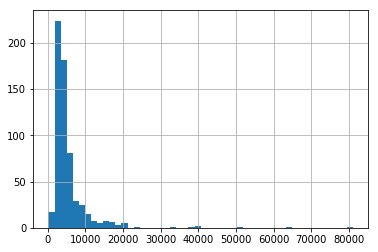

In [14]:
df['ApplicantIncome'].hist(bins=50)

* we can notice that there are 2 extreme values. (range of values) it may be because some people that take loan are educated and   other people are not. to see it more clearly let's use Box Plot that include ApplicantIncome and educated attributes.

C:\Users\shavit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


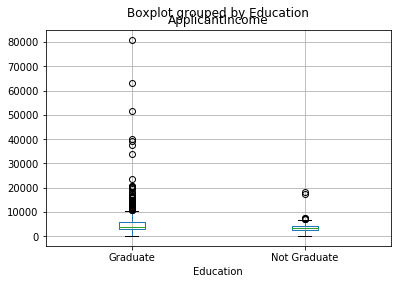

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Education')

* we can notice that there are no big difference between the mean income of graduate and not graduate, but there are more people that has higher income among the graduate.

let's check the ApplicantIncome by gender:

C:\Users\shavit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


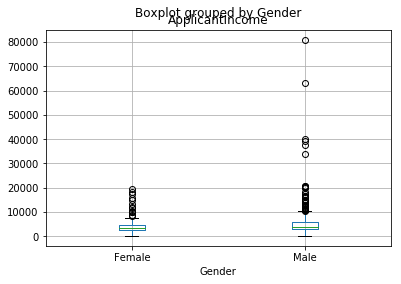

In [16]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

* we can notice that the mean income of females is lower than the income of males. and that there are only males that earn more than 20000.

let's take a look at the LoamAmount attribute distributiondf['LoanAmount'].hist(bins=50):

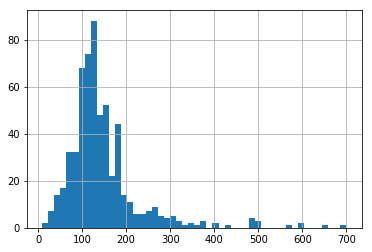

In [17]:
df['LoanAmount'].hist(bins=50)

Again, there are some extreme values...

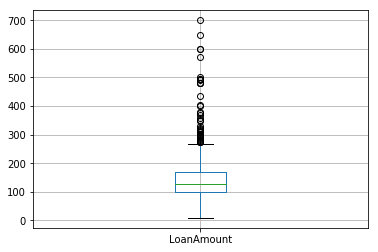

In [18]:
df.boxplot(column='LoanAmount')

C:\Users\shavit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


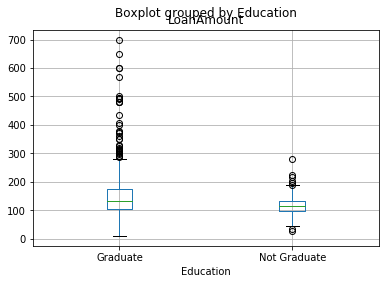

In [19]:
df.boxplot(column='LoanAmount', by = 'Education')

C:\Users\shavit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


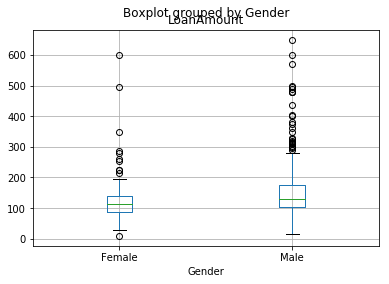

In [20]:
df.boxplot(column='LoanAmount', by = 'Gender')

* we can notice that the mean of loan among males are higher. 
* we can notice that few females but many males took loan of over than 300. 
* we can notice that educated people take higher loans.
* and more ...

now we eant to explore the "Credit_History" attribute, as we saw before, this attribute is categorial.
value of 1 means the a credit history is exist while 0 means that there is no history. 
first let's understand how many people have credit history:

In [21]:
df['Credit_History'].value_counts(ascending=True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

* we can notice that there are 89 people with no history, 475 with history and 50 null values that we don't know about them.

now we want to check the probability of getting loan for each category in Credit_History

In [22]:
df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


* we can notice that if there is Credit_History, the probabilty to get loan is very high (0.79)

let's look at it as a plot:

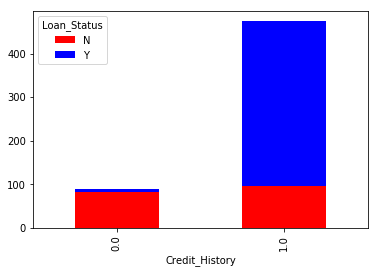

In [23]:
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# Data Munging

### STEP 1: Check missing values in the dataset

In [24]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we can notice that there are 22 Nans in LoanAmount , we will fill them by check if person is educated or self-employed and it will give us a good estimate of loan amount.

as we saw, Self_Employed has missing values (32), so first we will fill it. we also saw earlier that 500 are not self employed, this is more than 80% of the people, so we can fill the missing values with "No" because probably this is the value of most of them.

In [25]:
df['Self_Employed'].fillna('No',inplace=True)

In [26]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

now we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education attributes.

In [27]:
import numpy as np
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


Define function to return value of this pivot_table:

In [28]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

fill the missing values:

In [29]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [30]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

as we can see, LoanAmount has no NUll values now :)

### STEP 2: treat extreme values in distribution of LoanAmount and ApplicantIncome.

** LoanAmount **

we will try to enable log functions on the values and see if the distribution will be better. (we hope for normal distribution)

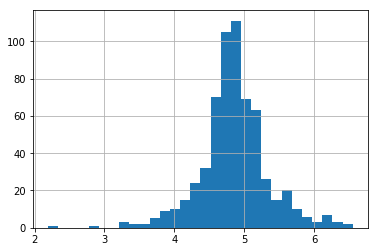

In [31]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=30)

the distribution now is better than we saw before, and it's more similar to normal distribution. an therefore the effect of extreme values has been significantly subsided.

**ApplicantIncome**

in order to get better distribution for this attribution, we assume that the reson for extreme values is because some people have lower income but string Co-applicants, so if we will add these fields to one field "totalIncome", the distribution will be more balanced and will be more similar to normal distribution.


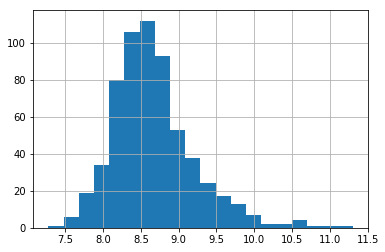

In [32]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

as we can see the distribution now is totaly better than it was, and from this point we will treat to this new field instead the tow others. ("ApplicantIncome","CoapplicantIncome")

### STEP 2: remove nulls.

In [33]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

*** Loan_Amount_Term *** - as we saw above, most of the values are 360 (more than 75%) so we will fill with this value: 

In [34]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

*** Credit_History *** - because value of 1 means that there is an credit history, the mean means the precentage of people that has credit history, as we saw above, the mean is ~84%, so we decided to fill nulls with the value of 1.

In [35]:
df['Credit_History'].fillna(1, inplace=True)

*** Dependents *** - as we can see above, most of the people has 0 value (57%), and from similar reasons we will fill the null values with 0 value. (57% is not so high, and it can make some noises to our prediction model, but because the ditribution for the other values are low significantly, we think it will be good enough) 

In [36]:
df['Dependents'].fillna(0, inplace=True)

***Married, Gender*** - same reason as above.

In [37]:
df['Married'].fillna('Yes', inplace=True)

In [38]:
df['Gender'].fillna('Male', inplace=True)

In [39]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

we take care for all the Null values. now we can continue to the next step. (:

# Building a Predictive Model in Python

we will build predictive model using sklearn package we saw at lecture, this package works only with numerical attributes.
in our case, we have some categorial values so we will convert them to numerical:

In [40]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [41]:
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import the required modules:

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\shavit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [43]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

### Test preparation

first, we will load the test file:

In [44]:
test = pd.read_csv("data//test.csv") 

we change all the attributes to numeric. (beside, Loan_ID that is a key attribute and we have to print it as is to the csv file)

In [45]:
from sklearn.preprocessing import LabelEncoder
var_mod_test = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod_test:
    test[i] = le.fit_transform(test[i].astype(str))

In [46]:
test.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

we will fill all the null values with the same way as we did with the the train csv file.

In [47]:
 test.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
test['Credit_History'].fillna(1, inplace=True)

In [49]:
test['Loan_Amount_Term'].fillna(360, inplace=True)

In [50]:
import numpy as np
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,0,1
Self_Employed,,
0,130.0,118.0
1,137.0,119.0
2,139.0,133.5


In [51]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [52]:
test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [53]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [54]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])

In [55]:
 test.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

as we can see, now there is no null values.

now we will create an fuction that will predict with the test.csv and get the solution to submit.

In [56]:
def submit_model(model, data, predictors, name):
    predictions = model.predict(data[predictors])
    submit = data['Loan_ID']
    predictions = pd.Series(predictions)
    submit = pd.concat([submit, predictions], names=['Loan_ID', 'Loan_Status'], axis=1)
    submit.columns = ['Loan_ID', 'Loan_Status']
    submit.to_csv('solution//' + name, index=False)

## Logistic Regression

In [57]:
outcome_var = 'Loan_Status'
modelLR = LogisticRegression()
predictor_var_LR = ['Credit_History']
classification_model(modelLR, df,predictor_var_LR,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


let's try to make the same model with more variables:

In [58]:
predictor_var_LR = ['Credit_History','Education','Married','Self_Employed','Property_Area','Gender']
classification_model(modelLR, df,predictor_var_LR,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


as we can see the result wasn't improved this is probably because credit history is very dominant value.

In [59]:
submit_model(modelLR,test,predictor_var_LR,'Linear_Regression.csv')

(0.777777777777778)

## Decision Tree

In [60]:
modelDT = DecisionTreeClassifier()
predictor_var_DT = ['Credit_History','Gender','Married','Education']
classification_model(modelDT, df,predictor_var_DT,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [61]:
submit_model(modelDT,test,predictor_var_DT,'Decision_Tree1.csv')

(0.777777777777778)

same result as regression... let's maybe try to change the variables for the model:

In [62]:
predictor_var_DT2 = ['Credit_History','Loan_Amount_Term','LoanAmount']
classification_model(modelDT, df,predictor_var_DT2,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.368%


In [63]:
submit_model(modelDT,test,predictor_var_DT2,'Decision_Tree2.csv')

(0.715277777777778)

Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps...

## Random Forest

In [64]:
modelRF = RandomForestClassifier(n_estimators=100)
predictor_var_RF = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(modelRF, df,predictor_var_RF,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.690%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting.
to solve this, we will see the feature importance matrix from which we’ll take the most important features.

In [65]:
featimp = pd.Series(modelRF.feature_importances_, index=predictor_var_RF).sort_values(ascending=False)
print(featimp)

TotalIncome_log     0.270473
Credit_History      0.265704
LoanAmount_log      0.229171
Dependents          0.056689
Property_Area       0.048305
Loan_Amount_Term    0.041689
Married             0.024549
Education           0.022336
Self_Employed       0.021312
Gender              0.019772
dtype: float64


try to take the top 6:

In [66]:
modelRF2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_RF2 = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(modelRF2, df,predictor_var_RF2,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.296%


* we notice that although accuracy reduced, the cross-validation score was improved and this is means that the model is generalizing well.

In [67]:
submit_model(modelRF2,test,predictor_var_RF2,'Random_Forest2.csv')

(0.756944444444444)

### KNeighbors

first we have to import this classifier:

In [68]:
from sklearn.neighbors import KNeighborsClassifier

let's try this model:

after we tried different values for the parameters we decided that:
* n_neighbors=3 (Number of neighbors to use)
* weights='uniform' (uniform weights. All points in each                         neighborhood are weighted equally.)

In [96]:
modelKN = KNeighborsClassifier(n_neighbors=3, weights='uniform')
predictor_var_KN = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(modelKN, df,predictor_var_KN,outcome_var)

Accuracy : 85.993%
Cross-Validation Score : 75.410%


In [70]:
submit_model(modelKN,test,predictor_var_KN,'KNeighbors.csv')

(0.736111111111111)

### AdaBoost

explanation for this new model:

"An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases."

first we have to import this classifier:

In [71]:
from sklearn.ensemble import AdaBoostClassifier

and try the model:

after we tried different values for the parameters we decided that:
* n_estimators = 40 (The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.)


In [108]:
modelAB = AdaBoostClassifier(n_estimators=40)
predictor_var_AB = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(modelAB, df,predictor_var_AB,outcome_var)

Accuracy : 84.202%
Cross-Validation Score : 79.154%


In [73]:
submit_model(modelAB,test,predictor_var_AB,'AdaBoost.csv')

(0.75)

this model accurancy is better than forest, but the CV is a bit lower. it should be the same or just a little bit better than the forest.


### SVC

* gamma=2
* C=2 - Penalty parameter C of the error term.

In [110]:
from sklearn.svm import SVC
modelSVC1 = SVC(gamma=2, C=2)
predictor_var_SVC1 = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(modelSVC1, df,predictor_var_SVC1,outcome_var)

Accuracy : 88.274%
Cross-Validation Score : 77.035%


In [75]:
submit_model(modelSVC1,test,predictor_var_SVC1,'SVC1.csv')

(0.763888888888889)

In [76]:
modelSVC2 =  SVC(kernel="linear", C=0.225)
predictor_var_SVC2 = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term']
classification_model(modelSVC2, df,predictor_var_SVC2,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [77]:
submit_model(modelSVC2,test,predictor_var_SVC2,'SVC2.csv')

(0.777777777777778)

### Naive_Bayes (GaussianNB)

In [78]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
predictor_var_NB = ['TotalIncome_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term','LoanAmount_log']
classification_model(modelNB, df,predictor_var_NB,outcome_var)

Accuracy : 80.619%
Cross-Validation Score : 80.458%


In [79]:
submit_model(modelNB,test,predictor_var_NB,'NB.csv')

(0.770833333333333)

###  QuadraticDiscriminantAnalysis

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

we will use the default parameters.

In [80]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
modelQDA = QuadraticDiscriminantAnalysis()
predictor_var_QDA = ['TotalIncome_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term','LoanAmount_log']
classification_model(modelQDA, df,predictor_var_QDA,outcome_var)

Accuracy : 80.782%
Cross-Validation Score : 80.133%


In [81]:
submit_model(modelQDA,test,predictor_var_QDA,'QDA.csv')

(0.777777777777778)

### Ensemble

let's ensemble all the high scores models together.
we will esemble the following models:

* QuadraticDiscriminantAnalysis
* Naive_Bayes
* Random_Forest
* Decision_Tree
* Linear_Regression
* SVC

(VotingClassifier - VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.)


In [117]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('QDA', modelQDA), ('NB', modelNB) , ('RF',modelRF2),('DT',modelDT),('LR',modelLR), ('SVC', modelSVC2)], voting='hard')
predictor_var_ECLF = ['TotalIncome_log','Credit_History','Dependents','Property_Area','Loan_Amount_Term','LoanAmount_log']
classification_model(eclf, df,predictor_var_ECLF,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 80.621%


In [83]:
submit_model(eclf,test,predictor_var_ECLF,'ECLF.csv')

(0.777777777777778)

*** Best result: 0.7777777777778***

we got with ensemble. (screenShot added)

(user: shavit , rank:1711)

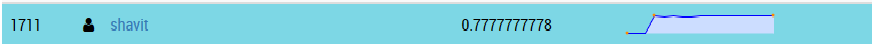

In [118]:
from IPython.display import Image
Image("image/leaderBoard.png")